In [3]:
!

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from statsmodels.formula.api import ols
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("D:\personal_projects\data analysis\Pricing-Optimization-main\Vendor_Data.csv")
data

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Product 1,95,92,2.8,0.6,0.00323,0.08906
1,Product 2,37,27,10.0,0.8,0.00106,0.01991
2,Product 3,34,26,8.5,0.6,0.00328,0.03778
3,Product 4,32,30,2.8,0.7,0.00000,0.08562
4,Product 5,62,45,16.0,1.0,0.00079,0.02637
...,...,...,...,...,...,...,...
245,Product 246,23,21,2.0,1.5,0.00290,0.07129
246,Product 247,59,57,1.5,0.5,0.00000,0.05905
247,Product 248,16,15,0.9,1.6,0.00095,0.04835
248,Product 249,84,71,13.2,0.8,0.00264,0.00473


In [6]:
data.head()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Product 1,95,92,2.8,0.6,0.00323,0.08906
1,Product 2,37,27,10.0,0.8,0.00106,0.01991
2,Product 3,34,26,8.5,0.6,0.00328,0.03778
3,Product 4,32,30,2.8,0.7,0.00000,0.08562
4,Product 5,62,45,16.0,1.0,0.00079,0.02637


Average Price per Unit: The market price of the product.

Cost per Unit: The current cost incurred for each unit of the product.

Average Profit per Unit: The profit earned on each unit sold.

Average Units Sold: The average number of units purchased per customer transaction.

Incremental Acquisition: The percentage increase in the customer response rate for every 10% reduction in unit price. Initially, the overall response rate is 5% (i.e., 5,000 out of 100,000 customers make a purchase). The maximum allowed price reduction, as per market regulations, is 10%.

Increase in Sales Volume: The percentage increase in the total sales volume when the unit price decreases by 10%. The maximum permissible price reduction is 10%, per market laws

In [7]:
data.describe

<bound method NDFrame.describe of         Products  Avg_Price_per_unit  Cost_per_unit  Average_Profit_per_unit  \
0      Product 1                  95             92                      2.8   
1      Product 2                  37             27                     10.0   
2      Product 3                  34             26                      8.5   
3      Product 4                  32             30                      2.8   
4      Product 5                  62             45                     16.0   
..           ...                 ...            ...                      ...   
245  Product 246                  23             21                      2.0   
246  Product 247                  59             57                      1.5   
247  Product 248                  16             15                      0.9   
248  Product 249                  84             71                     13.2   
249  Product 250                  38             28                      9.7   

     

In [8]:
for i in data.columns:
  print(i,len(pd.unique(data[i])))

Products 250
Avg_Price_per_unit 94
Cost_per_unit 84
Average_Profit_per_unit 151
Average_units_sold 31
Incremental_acquisition 128
Increase_sale_volume 250


In [9]:
data.isnull().sum()

Products                   0
Avg_Price_per_unit         0
Cost_per_unit              0
Average_Profit_per_unit    0
Average_units_sold         0
Incremental_acquisition    0
Increase_sale_volume       0
dtype: int64

In [10]:
data=data.drop(columns=['Products'])

In [11]:
data.shape

(250, 6)

In [12]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


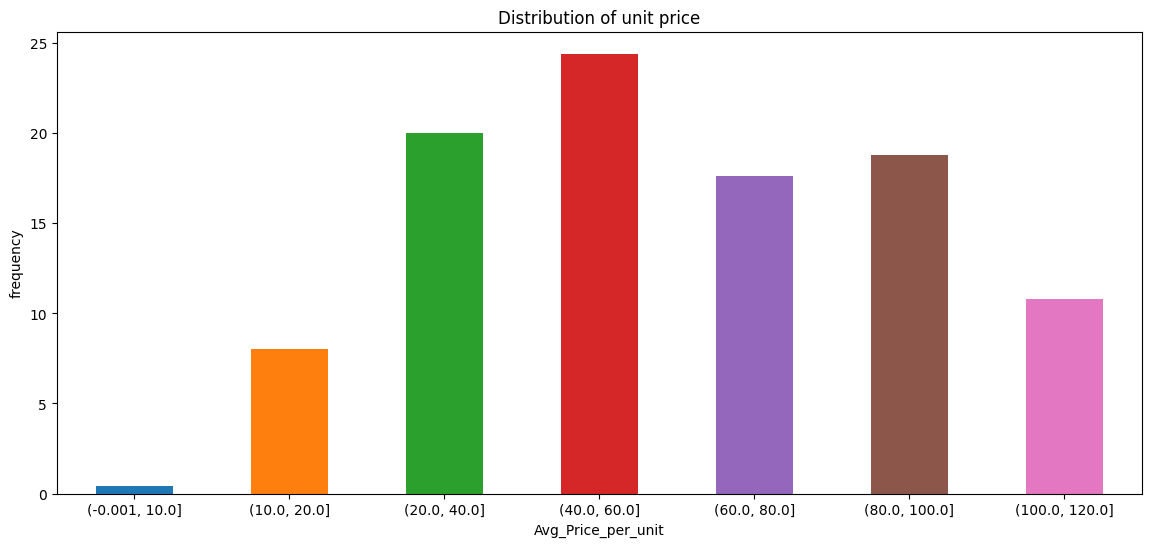

In [13]:
out = pd.cut(data['Avg_Price_per_unit'], bins=[0, 10, 20, 40,60, 80, 100, 120], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color=colors, figsize=(14,6))
plt.ylabel("frequency")
plt.title('Distribution of unit price')
plt.show()

In [14]:
profit_margin=[]
for i in range(250):
    sp=data['Avg_Price_per_unit'][i]
    cp=data['Cost_per_unit'][i]
    profit_margin.append((sp-cp)*100/cp)
    print(sp,cp,profit_margin)

95 92 [np.float64(3.260869565217391)]
37 27 [np.float64(3.260869565217391), np.float64(37.03703703703704)]
34 26 [np.float64(3.260869565217391), np.float64(37.03703703703704), np.float64(30.76923076923077)]
32 30 [np.float64(3.260869565217391), np.float64(37.03703703703704), np.float64(30.76923076923077), np.float64(6.666666666666667)]
62 45 [np.float64(3.260869565217391), np.float64(37.03703703703704), np.float64(30.76923076923077), np.float64(6.666666666666667), np.float64(37.77777777777778)]
86 78 [np.float64(3.260869565217391), np.float64(37.03703703703704), np.float64(30.76923076923077), np.float64(6.666666666666667), np.float64(37.77777777777778), np.float64(10.256410256410257)]
105 77 [np.float64(3.260869565217391), np.float64(37.03703703703704), np.float64(30.76923076923077), np.float64(6.666666666666667), np.float64(37.77777777777778), np.float64(10.256410256410257), np.float64(36.36363636363637)]
84 67 [np.float64(3.260869565217391), np.float64(37.03703703703704), np.float64(

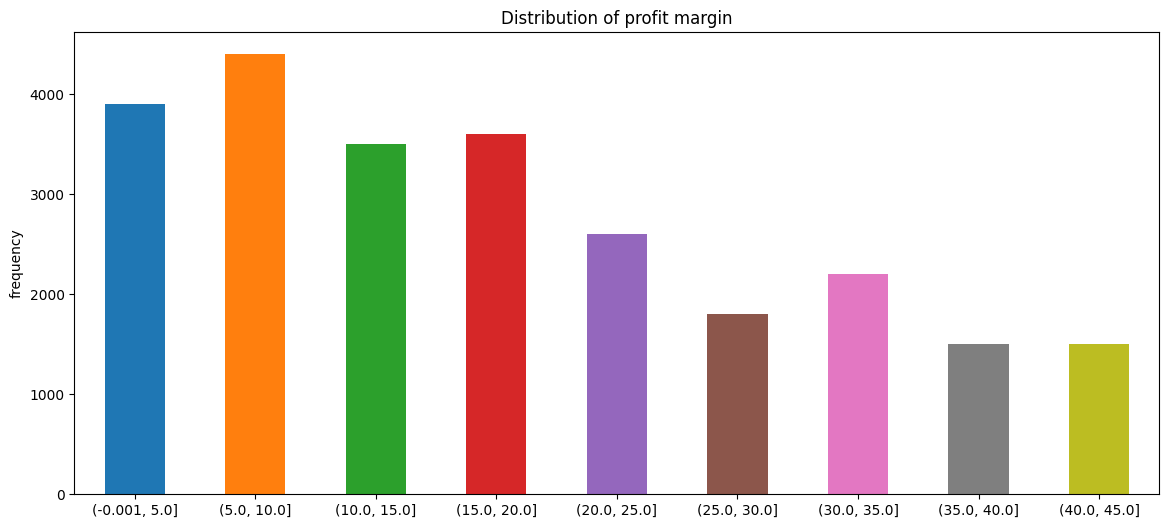

In [15]:
out = pd.cut(profit_margin, bins=[i for i in range(0,50,5)], include_lowest=True)
out_norm = out.value_counts().mul(100)
ax = out_norm.plot.bar(rot=0, color=colors, figsize=(14,6))
plt.ylabel("frequency")
plt.title('Distribution of profit margin')
plt.show()


ESTIMATE DEMAND MODEL:
A method to predict demand at different price points.

There is an inverse relationship between price and demand (as price increases, demand decreases).

The demand equation follows a linear model:

𝑦
=
𝑏
⋅
𝑥
+
intercept
y=b⋅x+intercept
Where:

y = Predicted demand

b = Impact of price on demand (slope)

x = Price point at which the product is sold

intercept = Baseline sales (demand when the price is zero)

In [16]:
# maximize total profit

# total_profit = demand * profit_on_unit_product

def maximize_total_profit(x,cost_price,intercept,slope):
    '''
    maximize_total_profit accepts the 'x' variable which changes by scipy model,'cost_price' is cost of a product
    'itercept' and 'slope' are values from demand equation.
    it returns the total profit for a product.
    '''
    total_profit= -1*((slope* x + intercept)*(x-cost_price))
    return total_profit

In [17]:
# converting to numpy array from pandas series
unit_price = np.array(data['Avg_Price_per_unit'],dtype=np.float64)
unit_cost = np.array(data['Cost_per_unit'],dtype=np.float64)
units_sold = np.array(data['Average_units_sold'],dtype=np.float64)
incr_sales = np.array(data['Increase_sale_volume'],dtype=np.float64)

In [18]:









def demand_function(prices,quantity):
    '''
    return the price_elasticity sales_point(intercept) by consturcting the ordinary least square model
    '''
    data_item={'Price':prices,'Quantity':quantity}
    df = pd.DataFrame(data=data_item) # converting  dictionary to  DataFrame
    ols_model = ols("Quantity~Price", data=df).fit() # fitting ols model
    price_elasticity = ols_model.params[1] # slope from ols model
    sales_point = ols_model.params[0] # intercept from ols model
    return (price_elasticity,sales_point)






<br> <p style="display:inline;text-align:left"> <img src="demand_curve.webp" alt="Demand Curve" style="width: 300px; float: right; margin-right: 15px;"> A decrease in the product's price leads to an increase in the quantity demanded, and vice versa. This relationship is illustrated by the **demand curve**, which shows the quantity demanded at different price levels.
Changes in quantity demanded are represented as movements along the demand curve. The degree to which quantity demanded responds to price changes is known as price elasticity of demand, which is linked to the slope of the demand curve.

</p>

In [19]:
def price_optimizer():
    '''
        calculating optimal price for the products
    '''
    total_initial_profit=0
    total_optimized_profit=0
    optimal_prices=[]
    number_of_products = data.shape[0]
    for i in range(number_of_products):
        p1=unit_price[i]
        q1 = units_sold[i]
        p2=90*p1/100
        q2=(100+incr_sales[i])*q1/100
        prices=[p1,p2]
        qunatity=[q1,q2]
        slope,intercept = demand_function(prices,qunatity) # receiving slope and intercept from ols model

        selling_price=unit_price[i]
        constraint=[(float(max(unit_cost[i],unit_price[i]*0.9))
                     ,unit_price[i]*1.2)] # setting constraints for the selling price (-10%,20%)

        maximize_result = minimize(maximize_total_profit,selling_price
                                   ,args=(unit_cost[i],intercept,slope*100)
                                   ,method='SLSQP',bounds=constraint) # receiving the maximized value for selling price
        total_initial_profit+=(selling_price-unit_cost[i])*units_sold[i]
        optimal_prices.append(maximize_result.x[0]) # optimal price list
        total_optimized_profit+=(maximize_result.x[0]-unit_cost[i])*units_sold[i] # total optimal price

    return optimal_prices,total_initial_profit,total_optimized_profit

In [20]:
optimal_prices, total_initial_profit, total_optimized_profit =  price_optimizer()

In [21]:
d={'selling_price':unit_price,'optimal_selling_price':optimal_prices }
result=pd.DataFrame(data=d)
result.head()

,selling_price,optimal_selling_price
0,95.0,99.809828
1,37.0,44.400000
2,34.0,40.800000
3,32.0,33.847223
4,62.0,74.400000


In [22]:
data.head()

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,95,92,2.8,0.6,0.00323,0.08906
1,37,27,10.0,0.8,0.00106,0.01991
2,34,26,8.5,0.6,0.00328,0.03778
3,32,30,2.8,0.7,0.00000,0.08562
4,62,45,16.0,1.0,0.00079,0.02637


<Axes: xlabel='Avg_Price_per_unit', ylabel='Increase_sale_volume'>

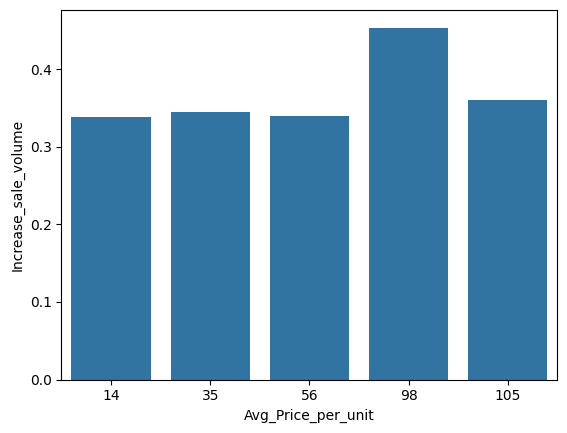

In [23]:
sales_price = data.groupby('Avg_Price_per_unit', as_index=False)['Increase_sale_volume'].sum()
sales_price = sales_price.sort_values(by='Increase_sale_volume', ascending=False).head()


sns.barplot(x='Avg_Price_per_unit', y='Increase_sale_volume', data=sales_price)

In [24]:
print("profit before optimization :",total_initial_profit)
print("profit after optimization :",total_optimized_profit)

profit before optimization : 3285.8999999999996
profit after optimization : 6600.850810156359
